In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [3]:
import numpy as np
import os

DATA_PATH = 'dataset'

In [4]:
from scipy.io import arff
import pandas as pd

def load_pulsar_csv(path = DATA_PATH):
    csv_path = os.path.join(path, 'HTRU_2.csv')
    return np.loadtxt(csv_path, delimiter=',', dtype=np.float32)

def load_pulsar_arff(path = DATA_PATH):
    arff_path = os.path.join(path, 'HTRU_2.arff')
    return arff.loadarff(arff_path)

In [5]:
arff_data = load_pulsar_arff()
df = pd.DataFrame(arff_data[0])

In [6]:
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,b'0'
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,b'0'
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,b'0'
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,b'0'
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,b'0'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Profile_mean        17898 non-null float64
Profile_stdev       17898 non-null float64
Profile_skewness    17898 non-null float64
Profile_kurtosis    17898 non-null float64
DM_mean             17898 non-null float64
DM_stdev            17898 non-null float64
DM_skewness         17898 non-null float64
DM_kurtosis         17898 non-null float64
class               17898 non-null object
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [8]:
# Number of negative and positive examples
df.loc[:,'class'].value_counts()

b'0'    16259
b'1'     1639
Name: class, dtype: int64

In [9]:
df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


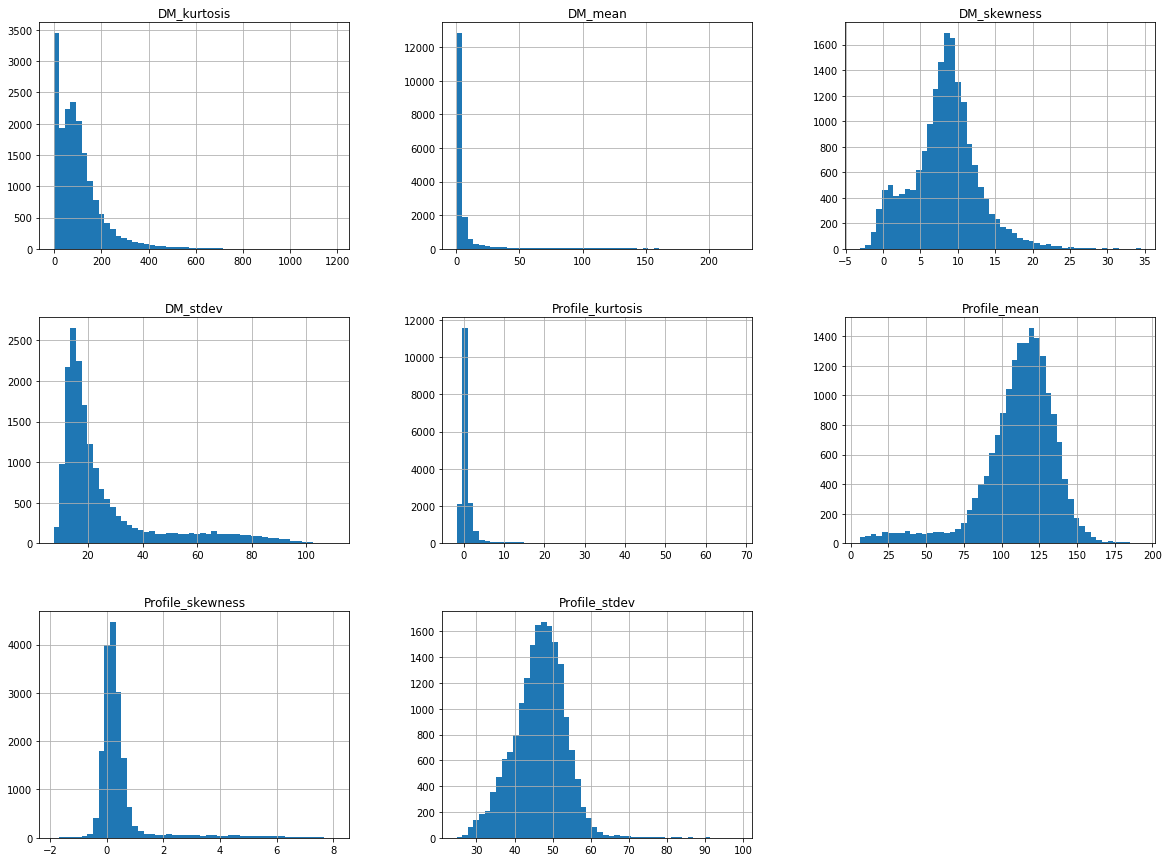

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
import numpy as np

def split_train_dataset(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Use hash of identifier to decide if instance goes into train or test set

In [20]:
# Random seed for replicability
np.random.seed(42)

train_set, test_set = split_train_dataset(df, 0.2)

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
3122,53.718750,43.479330,2.744515,8.742341,9.846154,37.547692,4.358591,19.439178,b'1'
843,108.804688,49.374060,0.442787,0.203601,3.658027,23.457268,7.679497,64.200187,b'0'
6674,107.187500,46.811749,0.166867,0.202784,0.512542,8.917347,22.981701,596.835211,b'0'
3273,120.281250,46.991678,0.123255,0.244877,3.437291,22.560923,7.466362,58.623733,b'0'
6222,133.703125,50.466164,0.192672,-0.200911,2.217391,14.253424,9.294305,113.348290,b'0'
16436,138.406250,46.575617,-0.105283,0.133890,2.297659,16.064409,9.876390,113.770837,b'0'
12752,98.445312,57.028064,0.555521,-0.472316,5.628763,28.008825,5.860685,36.790692,b'0'
10121,138.179688,47.848464,-0.131220,-0.027434,6.069398,31.553125,5.341068,28.111487,b'0'
3570,93.273438,51.757203,0.742549,0.474389,187.474080,60.763208,-2.269474,4.231114,b'0'
10751,108.679688,48.332820,0.306644,0.242936,2.191472,14.407331,9.520359,120.891870,b'0'


3579